In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

In [3]:
read = pd.read_pickle('../Pickle/read.pkl')
books = pd.read_pickle('../Pickle/books.pkl')
reviews = pd.read_pickle('../Pickle/reviews.pkl')
interactions = pd.read_pickle('../Pickle/interactions.pkl')

C:\Users\maddy\AppData\Local\Temp\ipykernel_26928\3572928456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=interactions, palette='viridis')


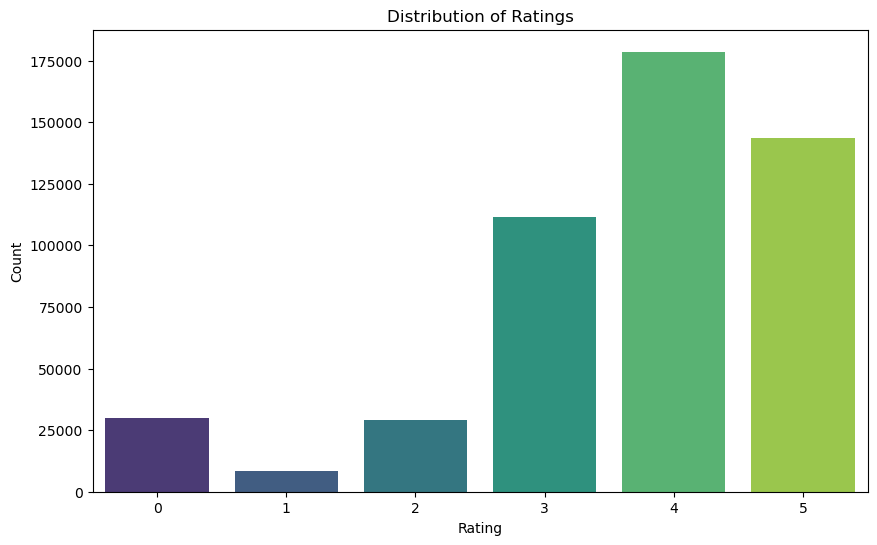

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=interactions, palette='viridis')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

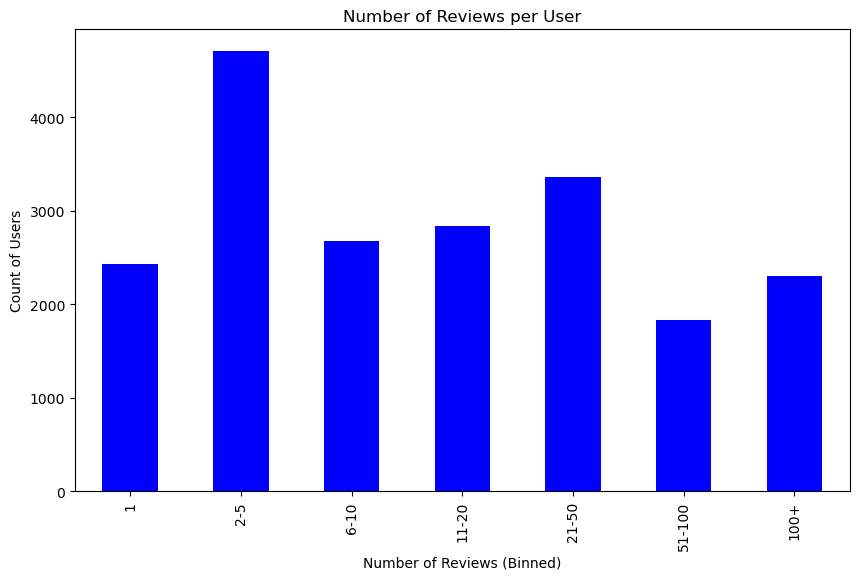

In [5]:
# Count the number of reviews per user
review_counts = reviews['user_id'].value_counts()

# Bin the data
bins = [0, 1, 5, 10, 20, 50, 100, review_counts.max()]
labels = ['1', '2-5', '6-10', '11-20', '21-50', '51-100', '100+']
review_counts_binned = pd.cut(review_counts, bins=bins, labels=labels, include_lowest=True)

# Create a bar plot of the binned data
plt.figure(figsize=(10, 6))
review_counts_binned.value_counts(sort=False).plot(kind='bar', color='blue')

# Add titles and labels
plt.title('Number of Reviews per User')
plt.xlabel('Number of Reviews (Binned)')
plt.ylabel('Count of Users')

# Show the plot
plt.show()

In [6]:
books['filtered_genres'] = books['filtered_genres'].apply(lambda x: x.split(', '))
genre_list = [genre for genres in books['filtered_genres'] for genre in genres]
genre_counts = pd.Series(genre_list).value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
print(genre_counts)

                 Genre   Count
0              fiction  228255
1              romance  143531
2           paranormal  114727
3              fantasy  114727
4              mystery  103010
5             thriller  103010
6                crime  103010
7              history   96923
8   historical fiction   96923
9            biography   96923
10         young-adult   67922
11         non-fiction   58537
12                       39083
13            children   36497
14              comics   25700
15             graphic   25700
16              poetry   11108


C:\Users\maddy\AppData\Local\Temp\ipykernel_26928\4024452978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')


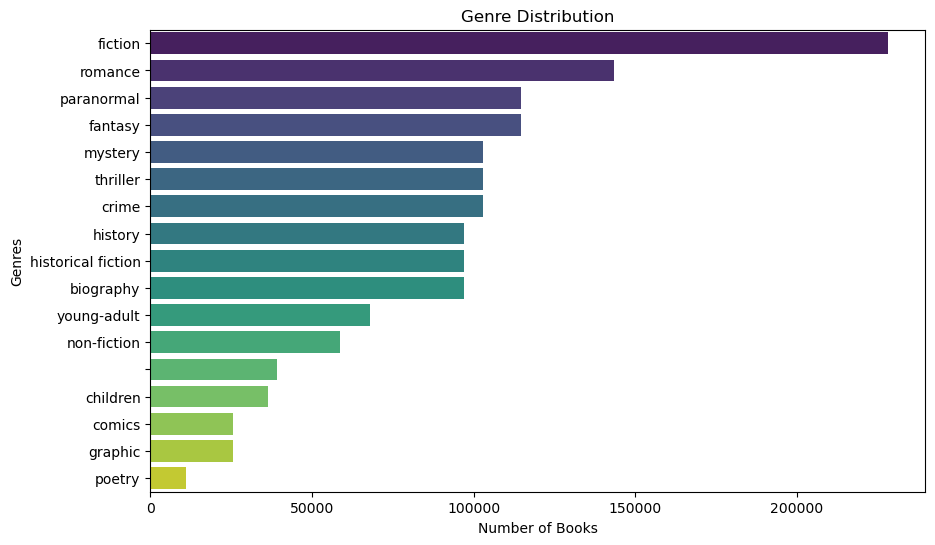

In [7]:
# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Number of Books')
plt.ylabel('Genres')
plt.show()

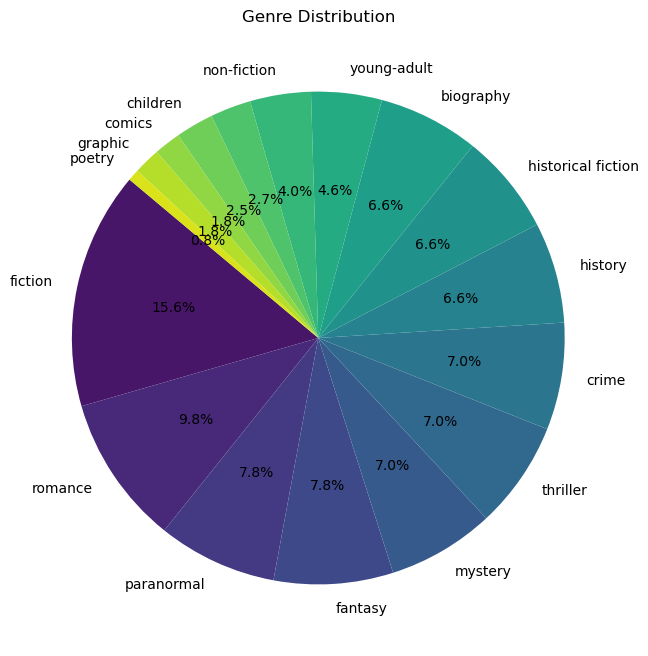

In [8]:
# Set up the plot
plt.figure(figsize=(8, 8))
plt.pie(genre_counts['Count'], labels=genre_counts['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(genre_counts)))
plt.title('Genre Distribution')
plt.show()

In [ ]:
# Bar plot for number of votes
plt.figure(figsize=(10, 6))
sns.barplot(x='review_id', y='n_votes', hue='review_id', data=reviews, palette='viridis', legend=False)
plt.title('Number of Votes for Reviews')
plt.xlabel('Review ID')
plt.ylabel('Number of Votes')
plt.show()

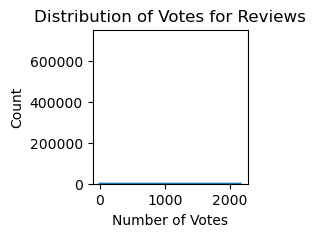

In [13]:
# Histogram for distribution of votes
plt.figure(figsize=(2, 2))
sns.histplot(reviews['n_votes'], kde=True)
plt.title('Distribution of Votes for Reviews')
plt.xlabel('Number of Votes')
plt.ylabel('Count')
plt.show()

In [ ]:
reviews['review_length'] = reviews['review_text'].progress_apply(len)
correlation_df = reviews[['rating', 'n_votes', 'review_length']]
corr_matrix = correlation_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', cbar=True)
plt.title('Correlation Matrix')
plt.show()
